In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import tkinter as tk
from tkinter import messagebox


## Reading data & Preprocessing

In [2]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [5]:
X, y = df.drop("Drug", axis=1), df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [6]:
X_train.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [7]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [8]:
X_train=X_train.astype('int64')
X_test=X_test.astype('int64')

## Defining Model and fitting

In [9]:



# --------------------------------------- Model Definition --------------------------------------- #
model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

# --------------------------------------- Model Training --------------------------------------- #

# Train
fit=model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)



In [10]:
train_pred=model.predict(X_train)

## Results

In [11]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, train_pred)))

Training-set accuracy score: 1.0000


In [12]:

print('Model accuracy score with information gain: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score with information gain: 1.0000


## Visualization

[Text(0.625, 0.9, 'Na_to_K <= 14.5\nsamples = 140\nvalue = [18, 8, 11, 39, 64]\nclass = drugY'),
 Text(0.5, 0.7, 'BP <= 1.5\nsamples = 76\nvalue = [18, 8, 11, 39, 0]\nclass = drugX'),
 Text(0.25, 0.5, 'Age <= 50.5\nsamples = 26\nvalue = [18, 8, 0, 0, 0]\nclass = drugA'),
 Text(0.125, 0.3, 'samples = 18\nvalue = [18, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.3, 'samples = 8\nvalue = [0, 8, 0, 0, 0]\nclass = drugB'),
 Text(0.75, 0.5, 'BP <= 2.5\nsamples = 50\nvalue = [0, 0, 11, 39, 0]\nclass = drugX'),
 Text(0.625, 0.3, 'Cholesterol <= 1.5\nsamples = 23\nvalue = [0, 0, 11, 12, 0]\nclass = drugX'),
 Text(0.5, 0.1, 'samples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(0.75, 0.1, 'samples = 12\nvalue = [0, 0, 0, 12, 0]\nclass = drugX'),
 Text(0.875, 0.3, 'samples = 27\nvalue = [0, 0, 0, 27, 0]\nclass = drugX'),
 Text(0.75, 0.7, 'samples = 64\nvalue = [0, 0, 0, 0, 64]\nclass = drugY')]

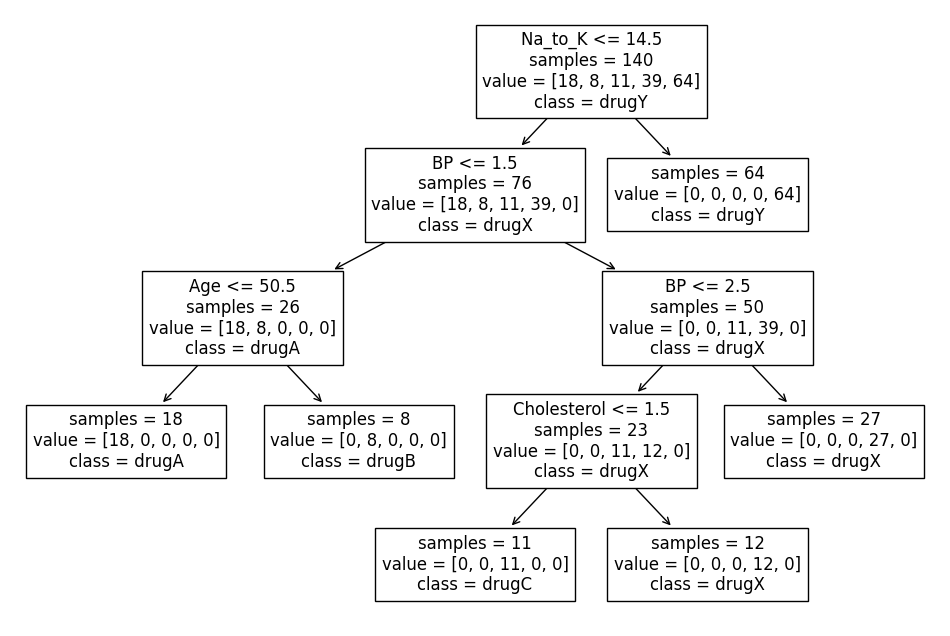

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(fit,
               class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
               feature_names=['Age','Sex' , 'BP', 'Cholesterol', 'Na_to_K'],impurity=False)

## UI Using Model's prediction

In [14]:
def test_decision_tree(input_values):
    # TODO: Implement your decision tree testing logic here
    pred=model.predict(np.expand_dims(input_values,axis=0))
    return pred


In [15]:
def create_ui():
    # Create a new window
    window = tk.Tk()
    window.title("Decision Tree Testing")

    # Create a label and entry for each input value
    input_labels = ["Age:", "Sex:", "Bloodp:","Cholesterol:","Na_k:"]
    input_entries = []
    for i, label_text in enumerate(input_labels):
        label = tk.Label(window, text=label_text)
        label.grid(row=i, column=0, sticky="e")
        entry = tk.Entry(window)
        entry.grid(row=i, column=1)
        input_entries.append(entry)

    # Create a button to trigger the decision tree testing
    def test_button_click():
        input_values = [float(entry.get()) for entry in input_entries]
        result = test_decision_tree(input_values)
        messagebox.showinfo("Result", f"The predicted class is: {result}")

    button = tk.Button(window, text="Test", command=test_button_click)
    button.grid(row=len(input_labels), columnspan=2)

    # Run the Tkinter event loop
    window.mainloop()

# Call the function to create the UI
create_ui()


c:\anaconda3\envs\tf2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\anaconda3\envs\tf2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## UI using Reasoning From Decision Tree

In [16]:
import tkinter as tk
from tkinter import messagebox

# Decision tree classification function
def classify_drug():
    age = int(age_entry.get())
    sex = int(sex_entry.get())
    bp = int(bp_entry.get())
    cholesterol = int(cholesterol_entry.get())
    Na_to_K = float(Na_to_K_entry.get())

    # Decision tree classification logic
    if Na_to_K <= 14.899:
        if bp <= 2.5:
            if cholesterol <= 1.5:
                if bp <= 1.5:
                    drug_class = "drugX"
                else:
                    drug_class = "drugA"
            else:
                drug_class = "drugA"
        else:
            if age <= 50.0:
                drug_class = "drugY"
            else:
                drug_class = "drugC"
    else:
        drug_class = "drugB"

    messagebox.showinfo("Result", f"The classified drug is: {drug_class}")


# Create the UI
window = tk.Tk()
window.title("Decision Tree Classifier")
window.geometry("400x300")

# Age input
age_label = tk.Label(window, text="Age:")
age_label.pack()
age_entry = tk.Entry(window)
age_entry.pack()

# Sex input
sex_label = tk.Label(window, text='Sex (Female= 1, Male= 2)')
sex_label.pack()
sex_entry = tk.Entry(window)
sex_entry.pack()

# Blood pressure input
bp_label = tk.Label(window, text="Blood Pressure (low= 1, Normal= 2, High= 3):")
bp_label.pack()
bp_entry = tk.Entry(window)
bp_entry.pack()

# Cholesterol input
cholesterol_label = tk.Label(window, text="Cholesterol (Normal= 1, High= 2):")
cholesterol_label.pack()
cholesterol_entry = tk.Entry(window)
cholesterol_entry.pack()

# Sodium to Potassium ratio input
Na_to_K_label = tk.Label(window, text="Na_to_K:")
Na_to_K_label.pack()
Na_to_K_entry = tk.Entry(window)
Na_to_K_entry.pack()

# Classification button
classify_button = tk.Button(window, text="Classify", command=classify_drug)
classify_button.pack()

window.mainloop()
